***
**Exercise 1**  
*Make a histogram from a 2d random distribution*

File found: ../title.basics.tsv
File found: ../data/title.ratings.tsv


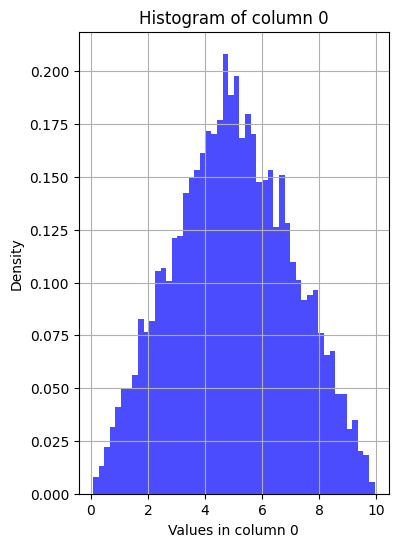

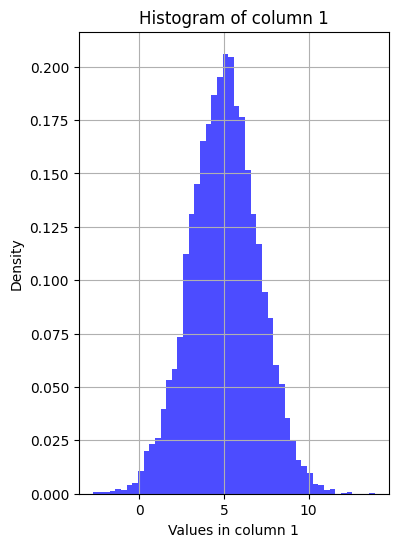

In [4]:
from data_aquisition import DataAquisition as aq

size = 10000

random_2d = aq.generate_2d_dist(size=size)


aq_instance = aq(random_2d)

aq_instance.plot_histograms()



**Exercise 2**  
*Make a 2d heat map from a 2d random distribution*

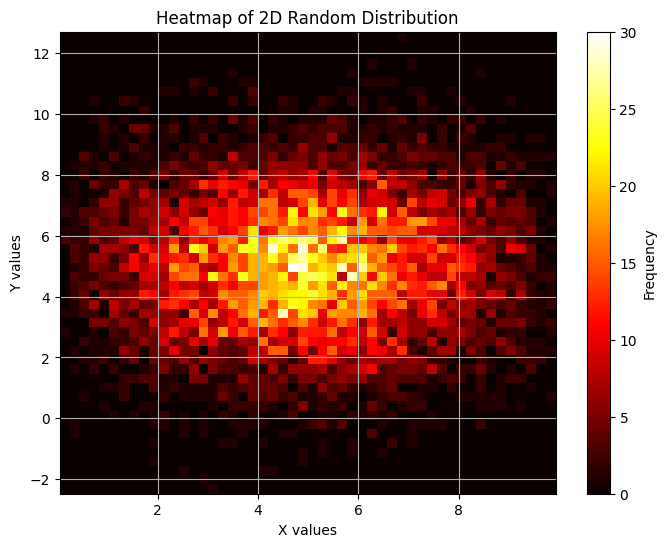

In [2]:
aq_instance.plot_heatmap() #Same distribution as above

**Exercise 3**  
*Make a histogram for the source data you selected*  
  

In [2]:
instance = aq

In [5]:
#Dataset too large to import
df_basics = aq.read_file_tsv(basics_filepath, columns=['tconst','startYear'], nrows=None)

In [7]:
import pandas as pd
compiled_df['startYear'] = pd.to_numeric(compiled_df['startYear'], errors='coerce') # Convert to numeric, setting errors to NaN

compiled_df = compiled_df.rename(columns={
    'tconst': 'Title ID',
    'startYear': 'Release year',
    'averageRating': 'Rating',
    'numVotes': 'Number of votes'
})

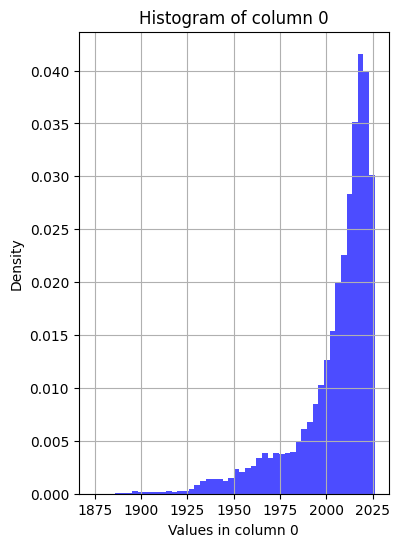

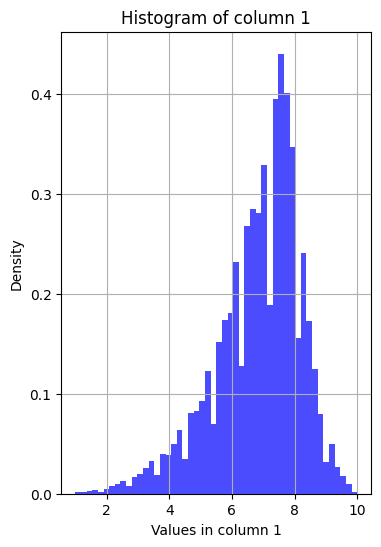

In [8]:
aq_instance2 = aq(compiled_df[['Release year', 'Rating']].to_numpy())
aq_instance2.plot_histograms()


**Exercise 4**  
*Convert the histogram into a discrete PMF*

In [ ]:
# Import 'tconst' and one other column (e.g., 'startYear') from aq_instance.basics
selected_columns = ['tconst', 'startYear']
df_selected = aqinstance.basics[selected_columns]
print(df_selected.head())

AttributeError: 'DataAquisition' object has no attribute 'basics'

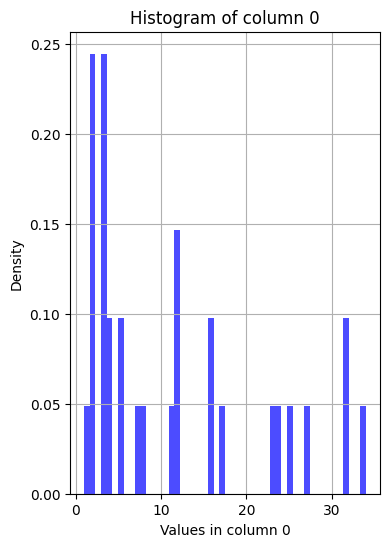

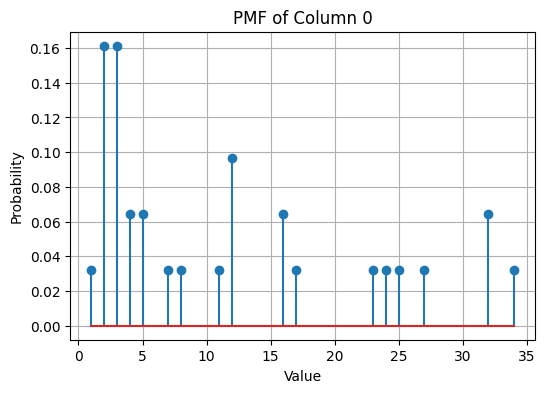

In [9]:
random_filepath = aq.check_path("../data/random_data.csv")
random_data_df = pd.read_csv(random_filepath) # Reading data from a random file to check if the code works.
aq_test = aq(random_data_df.values)
aq_test.plot_histograms()
aq_test.plot_all_pmfs()


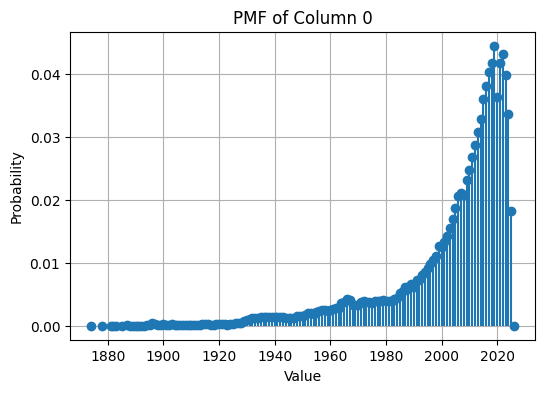

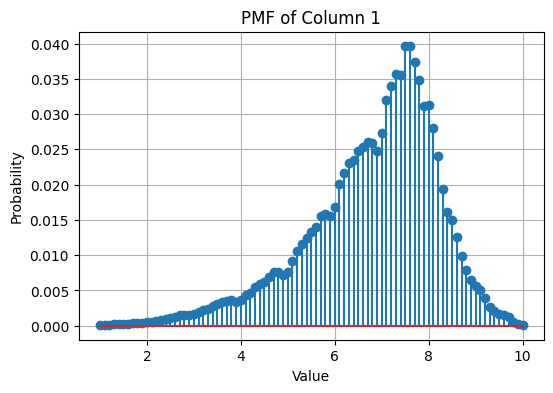

In [10]:
aq_instance2.plot_all_pmfs()

**Exercise 5**  
*Calculate the cumulative for each feature*

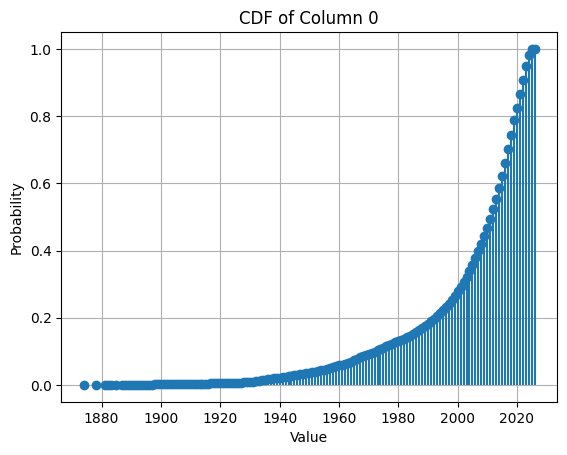

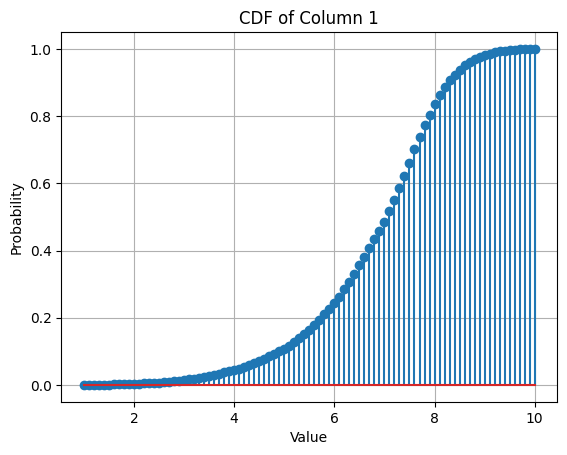

In [14]:
aq_instance2.plot_all_cdfs()